In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1b

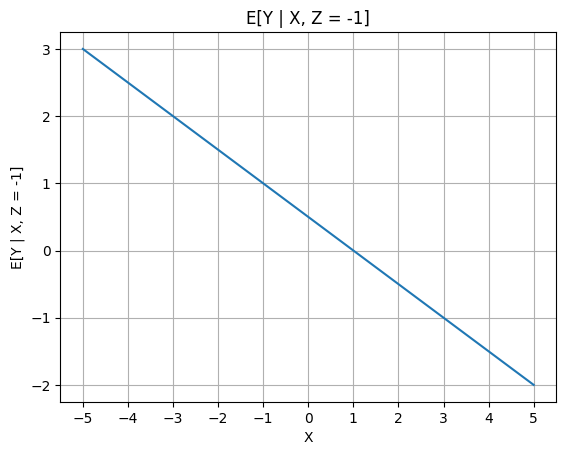

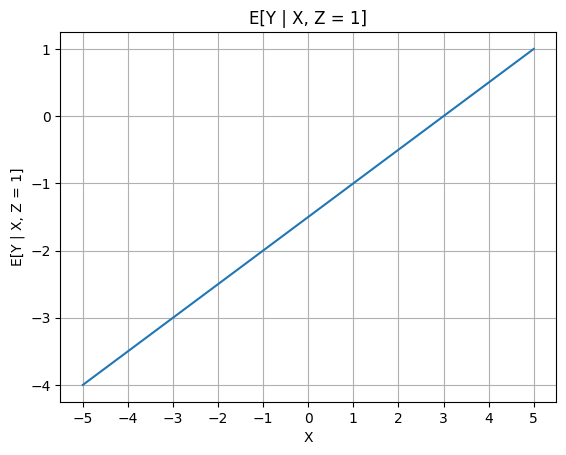

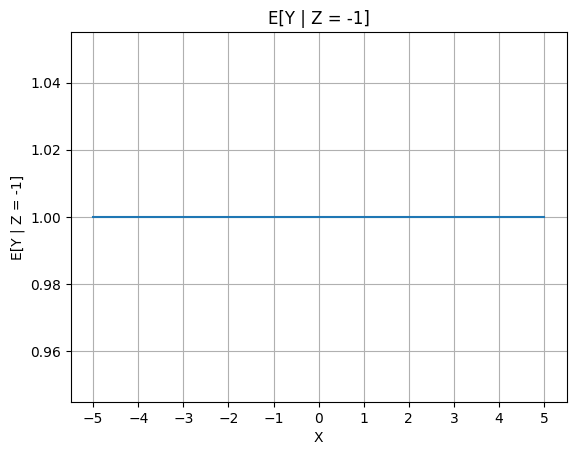

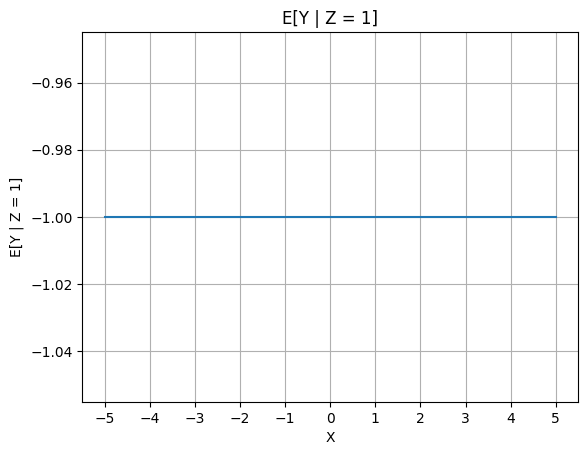

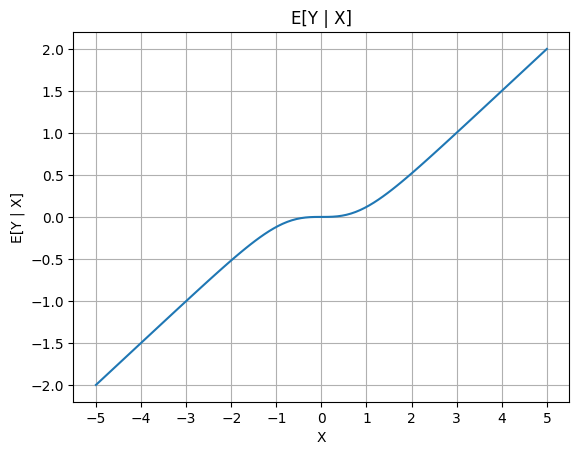

In [4]:
mu = 1
sigma_sq = 1
rho = 0.5

X = np.linspace(-5, 5, 100)
E_Y_given_X_Zneg1 = mu - rho * (X + mu)
E_Y_given_X_Z1 = -mu + rho * (X - mu)

E_Y_given_Zneg1 = mu
E_Y_given_Z = -mu

p = (1 / (1 + np.exp(-2 * X)))
E_Y_given_X = rho * X + mu * (1 - rho) * (1 - 2 * p)

def plot_cef(x, y, title):
    plt.plot(x, y)
    plt.title(title)
    plt.xlabel("X")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.ylabel(title)
    plt.grid(True)
    plt.show()

plot_cef(X, E_Y_given_X_Zneg1, "E[Y | X, Z = -1]")
plot_cef(X, E_Y_given_X_Z1, "E[Y | X, Z = 1]")
plot_cef(X, E_Y_given_Zneg1 * np.ones_like(X), "E[Y | Z = -1]")
plot_cef(X, E_Y_given_Z * np.ones_like(X), "E[Y | Z = 1]")
plot_cef(X, E_Y_given_X, "E[Y | X]")

# 2b

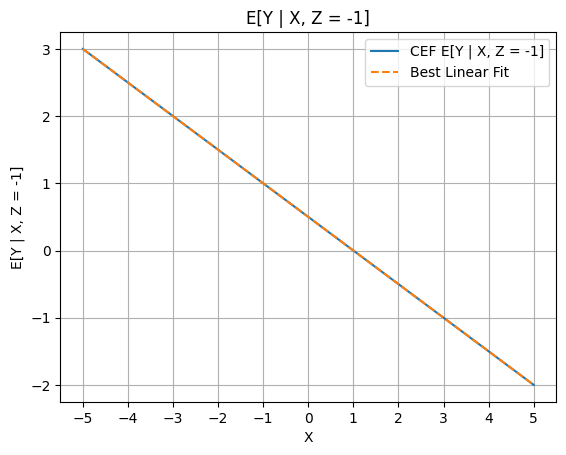

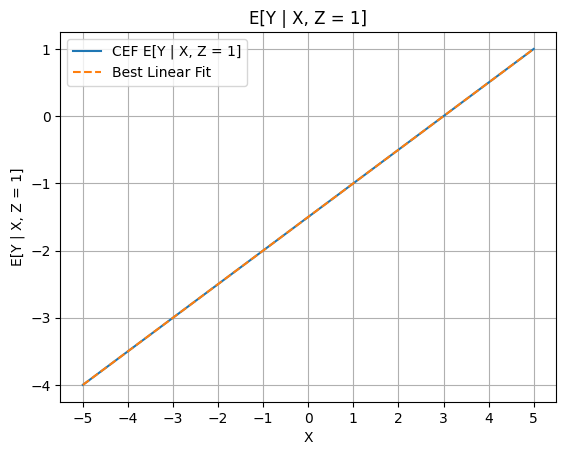

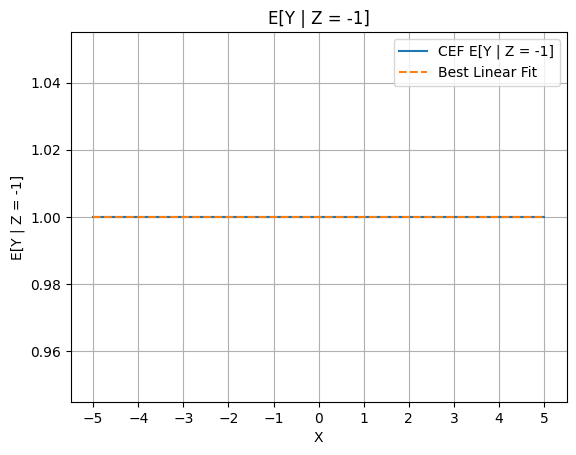

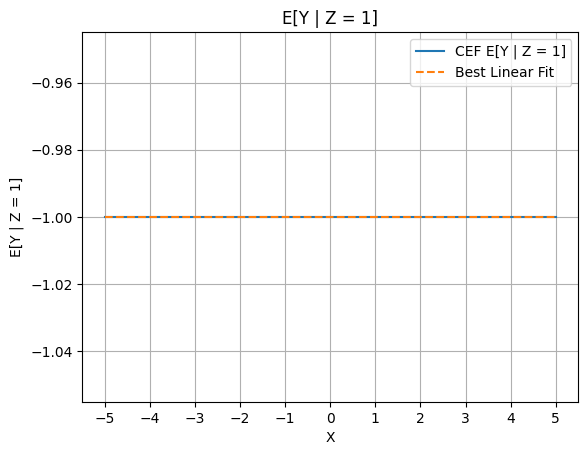

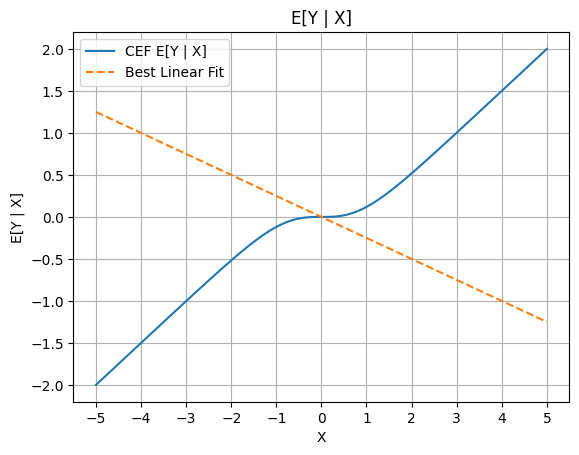

In [5]:
def plot_cef_bestfit(x, y, bestfit, title):
    plt.plot(x, y, label="CEF " + title)
    plt.plot(x, bestfit, linestyle='--', label="Best Linear Fit")
    plt.title(title)
    plt.xlabel("X")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.ylabel(title)
    plt.grid(True)
    plt.legend()
    plt.show()

plot_cef_bestfit(X, E_Y_given_X_Zneg1, 1 - 0.5 * (X + 1), "E[Y | X, Z = -1]")
plot_cef_bestfit(X, E_Y_given_X_Z1, -1 + 0.5 * (X - 1), "E[Y | X, Z = 1]")
plot_cef_bestfit(X, E_Y_given_Zneg1 * np.ones_like(X), np.ones_like(X), "E[Y | Z = -1]")
plot_cef_bestfit(X, E_Y_given_Z * np.ones_like(X), -np.ones_like(X), "E[Y | Z = 1]")
plot_cef_bestfit(X, E_Y_given_X, (rho * sigma_sq - mu**2) * X / (sigma_sq + mu**2), "E[Y | X]")

All of the fits make sense and are perfect except for $E[Y | X]$. This is indicative
of Simpson's paradox.

# 3b

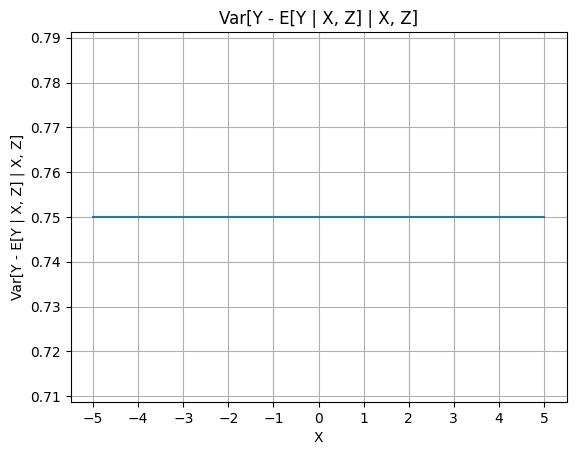

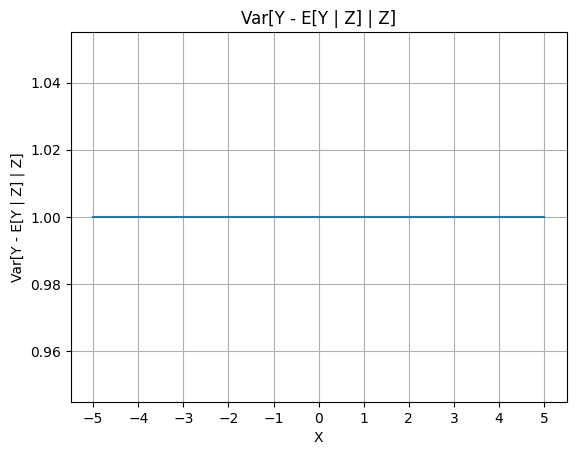

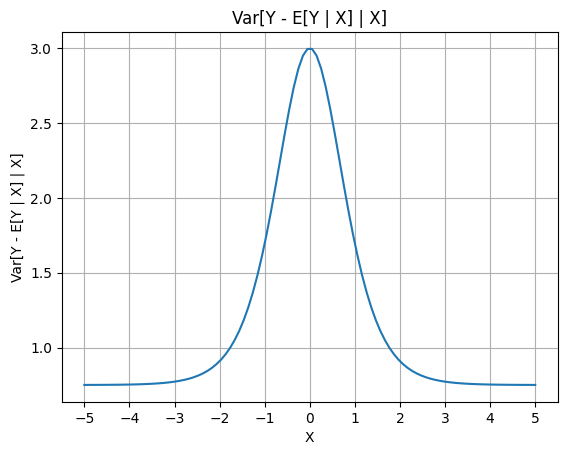

In [6]:
def plot_cef_var(x, var, title):
    plt.plot(x, var)
    plt.title(title)
    plt.xlabel("X")
    plt.xticks(np.arange(min(x), max(x) + 1, 1))
    plt.ylabel(title)
    plt.grid(True)
    plt.show()

plot_cef_var(X, sigma_sq * (1 - rho**2) * np.ones_like(X), "Var[Y - E[Y | X, Z] | X, Z]")
plot_cef_var(X, sigma_sq * np.ones_like(X), "Var[Y - E[Y | Z] | Z]")
plot_cef_var(X, sigma_sq * (1 - rho**2) + p*(1 - p)*(2*mu*(1 + rho))**2, "Var[Y - E[Y | X] | X]")

Plots make sense as the variance shouldn't vary for linear CEF's, but non linear
CEF should have variable variance around 0 which quickly reaches asymptotic nature
as we go further out with X as seen in the last plot for 1a.